In [1]:
#importing the pacakges and modules required for the program
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import normalize, to_categorical

from keras.datasets import mnist

C:\Users\Neeraj\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Neeraj\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Neeraj\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Neeraj\AppData\Roaming\Python\Python36\s

In [2]:
#Loading the MNIST dataset and pre-processing for the model

(x_train, y_train) , (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train = normalize(x_train,axis = 1)
x_test = normalize(x_test,axis = 1)

In [19]:
#Defining the Model architecture and parameters

model = Sequential()

model.add(Conv2D(8, (3,3), input_shape = x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.05))

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

#Specifying the metrics for the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
activation_20 (Activation)   (None, 26, 26, 8)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 32)        2336      
_________________________________________________________________
activation_21 (Activation)   (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 11, 11, 32)        0         
__________

In [21]:
#Training the model
model.fit(x_train,y_train,batch_size=32,epochs=10,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 19s 349us/step - loss: 0.2351 - acc: 0.9290 - val_loss: 0.0974 - val_acc: 0.9715
Epoch 2/10
54000/54000 [==============================] - 19s 356us/step - loss: 0.0963 - acc: 0.9696 - val_loss: 0.0709 - val_acc: 0.9788
Epoch 3/10
54000/54000 [==============================] - 20s 375us/step - loss: 0.0721 - acc: 0.9768 - val_loss: 0.0646 - val_acc: 0.9803
Epoch 4/10
54000/54000 [==============================] - 20s 373us/step - loss: 0.0577 - acc: 0.9815 - val_loss: 0.0509 - val_acc: 0.9853
Epoch 5/10
54000/54000 [==============================] - 20s 373us/step - loss: 0.0457 - acc: 0.9854 - val_loss: 0.0464 - val_acc: 0.9862
Epoch 6/10
54000/54000 [==============================] - 20s 374us/step - loss: 0.0365 - acc: 0.9875 - val_loss: 0.0445 - val_acc: 0.9878
Epoch 7/10
54000/54000 [==============================] - 20s 374us/step - loss: 0.0303 - acc: 0.9899 - val_loss: 0.0

In [22]:
#Evaluating the model in the Test Set
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 111us/step


[0.04920624656850705, 0.9857]

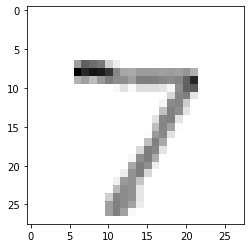

In [32]:
#Visualization using Matplotlib

import matplotlib.pyplot as plt
plt.imshow(x_test[0].reshape(28,28) , cmap = plt.cm.binary)
plt.show()

In [29]:
#Predicting from the model

pred = model.predict(x_test)

In [30]:
pred

array([[4.58565269e-10, 7.42477357e-10, 1.10781365e-07, ...,
        9.99999762e-01, 2.12917350e-10, 4.17646540e-09],
       [1.98193746e-08, 1.02313311e-06, 9.99998808e-01, ...,
        7.04450560e-12, 9.88005144e-09, 1.25932154e-10],
       [4.91667904e-13, 1.00000000e+00, 1.43342685e-10, ...,
        4.37880265e-09, 2.21105356e-10, 1.15703957e-11],
       ...,
       [1.43534750e-12, 2.54324675e-07, 2.26735575e-11, ...,
        4.11838414e-07, 1.25938523e-05, 9.25454003e-07],
       [3.64573953e-12, 3.37958897e-11, 1.10110125e-08, ...,
        3.37472389e-12, 3.56909179e-04, 4.15318652e-14],
       [2.16721764e-06, 2.46374213e-07, 5.07449442e-07, ...,
        1.48167676e-11, 1.16767760e-08, 2.81063883e-08]], dtype=float32)

In [33]:
import numpy as np
print(np.argmax(pred[0]))

7
